# Summary
This demonstrates reconstruction of a Fresnel CDI dataset and compares the result to ePIE reconstruction. 

The probe structure allows reconstruction in CDI mode, i.e. without real-space overlap constraints. 

Scanning CDI reconstruction is also possible here, but results in a lower-quality image because of scan position jitter in this dataset.

## Object ePIE reconstruction: 
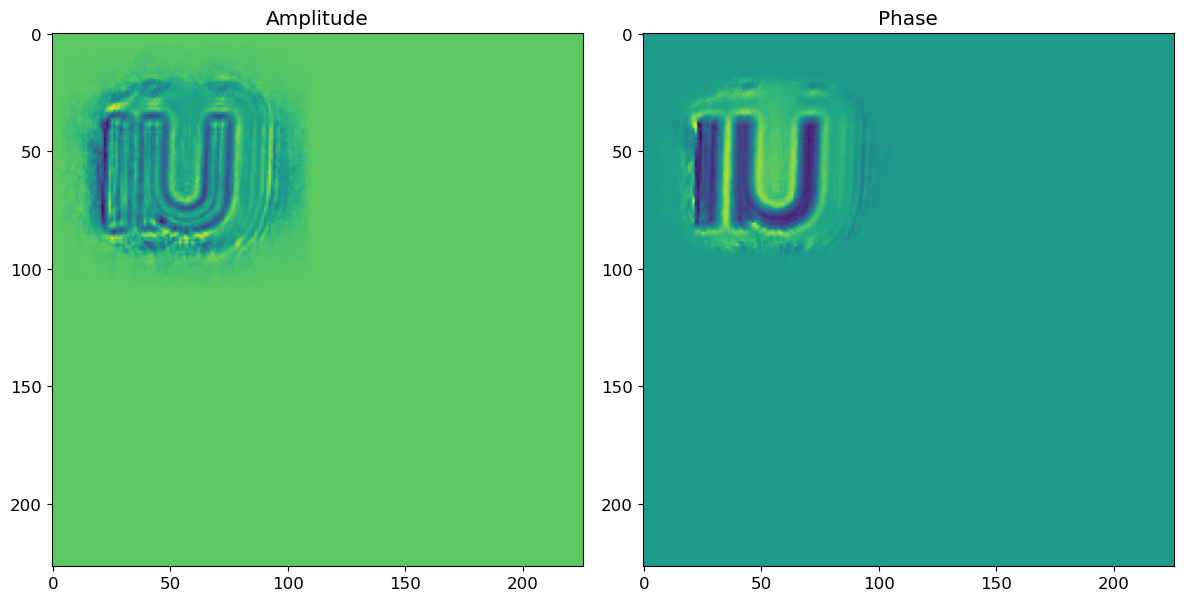

In [1]:
from scipy.ndimage import zoom
import numpy as np

def init():
    from ptycho import params as p
    
    p.cfg['nepochs'] = 50
    p.cfg['output_prefix'] = 'tmp'
    p.cfg['nimgs_train'] = 1
    p.cfg['nimgs_test'] = 1
    p.cfg['intensity_scale.trainable'] = True
    p.cfg['positions.provided'] = True
    p.cfg['probe.big'] = True
    p.cfg['probe.mask'] = False

    p.cfg['data_source'] = 'generic'
    p.cfg['gridsize'] = 1
    p.cfg['probe_scale'] = 5
    p.cfg['train_data_file_path'] = 'train_data.npz'
    p.cfg['test_data_file_path'] = 'test_data.npz'


# IMPORTANT: must call init() BEFORE the dataset definition
init()

In [2]:
!ln -s ../tests/test_generic_loader.py
import test_generic_loader;
train_raw, test_raw = test_generic_loader.test_generic_loader(remove = False,
            path = '../ptycho/datasets/Run1084_recon3_postPC_shrunk_3.npz');

ln: failed to create symbolic link './test_generic_loader.py': File exists


2024-06-03 15:02:07.278538: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-03 15:02:07.278581: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-03 15:02:07.279777: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-03 15:02:07.286305: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-03 15:02:07.980812: W tensorflow/compiler/tf2

/home/ollie/anaconda3/envs/py310_2/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
2024-06-03 15:02:09.508199: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-03 15:02:09.508486: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read fr

DEBUG: Setting probe to tf.Tensor(
[[[4.6315027e-09]
  [4.6315027e-09]
  [4.6315027e-09]
  ...
  [4.6315027e-09]
  [4.6315027e-09]
  [4.6315027e-09]]

 [[4.6315027e-09]
  [4.6315027e-09]
  [4.6315027e-09]
  ...
  [4.6315027e-09]
  [4.6315027e-09]
  [4.6315027e-09]]

 [[4.6315027e-09]
  [4.6315027e-09]
  [4.6315027e-09]
  ...
  [4.6315027e-09]
  [4.6315027e-09]
  [4.6315027e-09]]

 ...

 [[4.6315027e-09]
  [4.6315027e-09]
  [4.6315027e-09]
  ...
  [4.6315027e-09]
  [4.6315027e-09]
  [4.6315027e-09]]

 [[4.6315027e-09]
  [4.6315027e-09]
  [4.6315027e-09]
  ...
  [4.6315027e-09]
  [4.6315027e-09]
  [4.6315027e-09]]

 [[4.6315027e-09]
  [4.6315027e-09]
  [4.6315027e-09]
  ...
  [4.6315027e-09]
  [4.6315027e-09]
  [4.6315027e-09]]], shape=(64, 64, 1), dtype=float32) in params
DEBUG: Setting probe_mask to tf.Tensor(
[[[[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]

  ...

  [[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]]


 [[[0.+0.j]]

  [[0.+0.j]]

  [[0.+0.j]]

  ...

  [[0.+0.j]]

  [[0.+0.j]]

  [[0.+0

In [21]:
%pdb

Automatic pdb calling has been turned ON


In [3]:
from ptycho import probe
from ptycho import params as p

from ptycho.xpp import *
probe_amp = np.absolute(probeGuess)
mask = np.absolute(p.get('probe_mask'))[:, :, 0, 0]
probe.set_probe_guess(None, probeGuess)

from ptycho.evaluation import save_metrics
from ptycho.evaluation import trim
from ptycho import tf_helper as hh

DEBUG: Setting probe to tf.Tensor(
[[[-0.00651507+1.4380710e-02j]
  [ 0.01283696+1.7046710e-02j]
  [-0.03114917+4.6514906e-03j]
  ...
  [-0.00702214-2.3603119e-02j]
  [ 0.01094224+4.2910941e-02j]
  [-0.03161414-1.0882590e-02j]]

 [[ 0.01503608+8.6904122e-03j]
  [ 0.00689386-2.6355132e-02j]
  [-0.00529759+2.6545117e-02j]
  ...
  [-0.00754843-4.3737483e-03j]
  [ 0.01948243-1.0916220e-02j]
  [ 0.01479488-6.1852732e-03j]]

 [[ 0.00480844-1.8001227e-02j]
  [-0.02428803+8.5864980e-03j]
  [-0.00135581+2.1527281e-02j]
  ...
  [ 0.00340497+2.7510835e-02j]
  [ 0.00907174-4.9521357e-02j]
  [ 0.02616441+2.3693807e-02j]]

 ...

 [[ 0.0269782 +6.2509187e-02j]
  [-0.02179178+1.1454654e-03j]
  [-0.0062075 -1.4121581e-02j]
  ...
  [ 0.02911633+4.3498869e-03j]
  [-0.02921897+1.1685294e-02j]
  [ 0.0171632 -4.5767725e-02j]]

 [[-0.04212391-3.5519141e-05j]
  [ 0.01608743-5.1518381e-03j]
  [-0.02547074+4.0439606e-02j]
  ...
  [-0.02248588-3.0875669e-03j]
  [ 0.00716038-2.3343405e-02j]
  [ 0.03915279-1.95125

In [4]:
import tensorflow as tf

tf.random.set_seed(45)
np.random.seed(45)
from ptycho import params as p
from ptycho import train, model
from ptycho.train import *
from ptycho.nbutils import *

# channel dimensions size should be 1 in CDI mode, 4 in ptycho mode
ptycho_dataset.test_data.X.shape, ptycho_dataset.train_data.X.shape

DEBUG: Setting timestamp to 06/03/2024, 15:02:10 in params
neighbor-sampled diffraction shape (512, 64, 64, 1)
neighbor-sampled diffraction shape (1024, 64, 64, 1)


2024-06-03 15:02:10.202958: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1.4000863528229466
input shape (None, 64, 64, 1)
Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 tf.math.truediv (TFOpLambd  (None, 64, 64, 1)            0         ['input[0][0]']               
 a)                                                                                               
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64

2024-06-03 15:02:12.400315: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-06-03 15:02:12.400342: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-06-03 15:02:12.400369: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1883] Profiler found 1 GPUs
2024-06-03 15:02:12.400674: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:137] cuptiGetTimestamp: error 999: 
2024-06-03 15:02:12.400684: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:186] cuptiSubscribe: ignored due to a previous error.
2024-06-03 15:02:12.400689: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:459] cuptiGetResultString: ignored due to a previous error.
2024-06-03 15:02:12.400695: E external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1935] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with

input shape (None, 64, 64, 1)
input shape (None, 64, 64, 1)


2024-06-03 15:02:15.086995: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-06-03 15:02:15.087565: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x5ea3af271fa0
2024-06-03 15:02:15.197735: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-03 15:02:16.595842: I external/local_xla/xla/service/service.cc:168] XLA service 0x7e5d3d3691f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-03 15:02:16.595871: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-06-03 15:02:16.599424: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1717441336.671202  685618 device_compiler.h:186] Compiled cluster 

31/31 [==============================] - 10s 80ms/step - loss: 203312944.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 112.2353 - distribution_lambda_loss: 203312944.0000 - val_loss: 161995664.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 98.9505 - val_distribution_lambda_loss: 161995664.0000 - lr: 0.0010
Epoch 2/50
31/31 [==============================] - 0s 14ms/step - loss: 130818720.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 90.7192 - distribution_lambda_loss: 130818720.0000 - val_loss: 91531376.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 76.2894 - val_distribution_lambda_loss: 91531376.0000 - lr: 0.0010
Epoch 3/50
31/31 [==============================] - 0s 14ms/step - loss: 95712112.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 78.2422 - distribution_lambda_loss: 95712112.0000 - val_loss: 66635984.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 66.1015 - val_distri

(TensorShape([1024, 64, 64, 1]), TensorShape([512, 64, 64, 1]))

# Dataset description

In [6]:
print(test_raw)

RawData: 
xcoords: (1024,) 
ycoords: (1024,) 
xcoords_start: (1024,) 
ycoords_start: (1024,) 
diff3d: (1024, 64, 64) 
probeGuess: (64, 64) 
scan_index: (1024,) 
objectGuess: Present


In [7]:
test_data = ptycho_dataset.test_data
train_data = ptycho_dataset.train_data

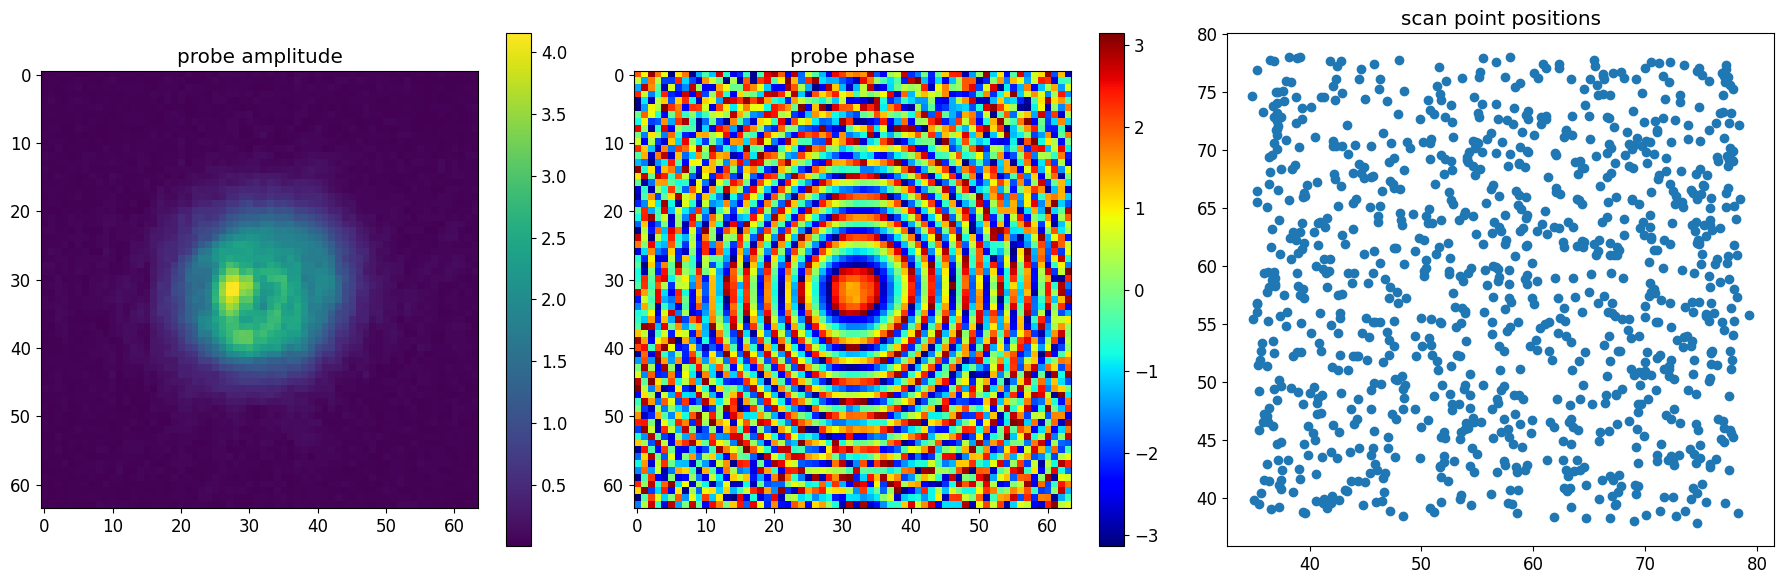

In [8]:
# Note the randomized scan point positions
probeshow(probeGuess, ptycho_dataset.test_data)

## Reconstruct the full test object image and compare to the ePIE reconstruction:

32/32 [==============================] - 0s 5ms/step
PADDING SIZE: 23
PADDING SIZE: 23


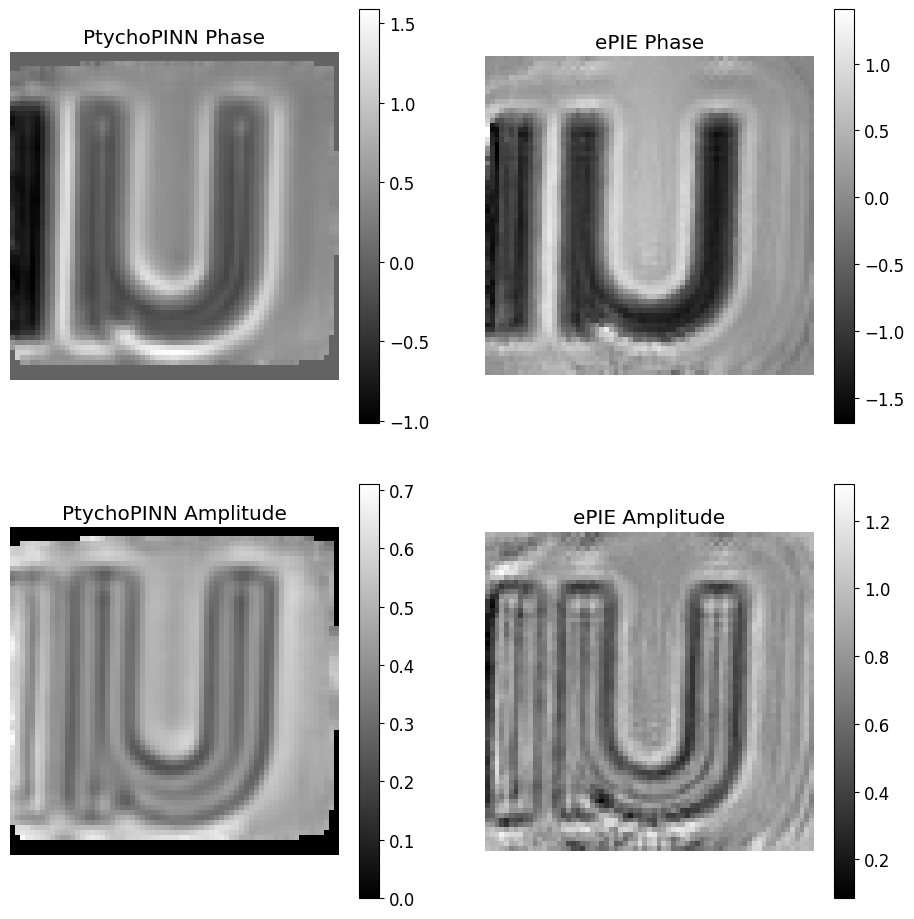

CPU times: user 639 ms, sys: 230 ms, total: 868 ms
Wall time: 697 ms


In [11]:
%%time
obj_tensor_full, global_offsets = reconstruct_image(test_data)
obj_image = loader.reassemble_position(obj_tensor_full, global_offsets[:, :, :, :], M = 20)

recon_amp_ptychopinn = np.absolute(obj_image)
recon_phase_ptychopinn = np.angle(obj_image)

ptycho_pinn_phase = recon_phase_ptychopinn[..., 0]
ptycho_pinn_amplitude = recon_amp_ptychopinn[..., 0]

epie_phase = crop_to_non_uniform_region_with_buffer(np.angle(objectGuess), buffer=-20)
epie_amplitude = crop_to_non_uniform_region_with_buffer(np.absolute(objectGuess), buffer=-20)

mk_epie_comparison2x2(ptycho_pinn_phase, epie_phase, ptycho_pinn_amplitude,epie_amplitude)

Reconstruction for a single solution region:

In [15]:
Y_phi_test.shape

TensorShape([1024, 64, 64, 1])

phase min: -3.0719066 phase max: 2.885231


/home/ollie/anaconda3/envs/py310_2/lib/python3.10/site-packages/ptycho/evaluation.py:80: RuntimeWarning: divide by zero encountered in log
  true_diffraction = np.log(X_test)[i, :, :, channel]


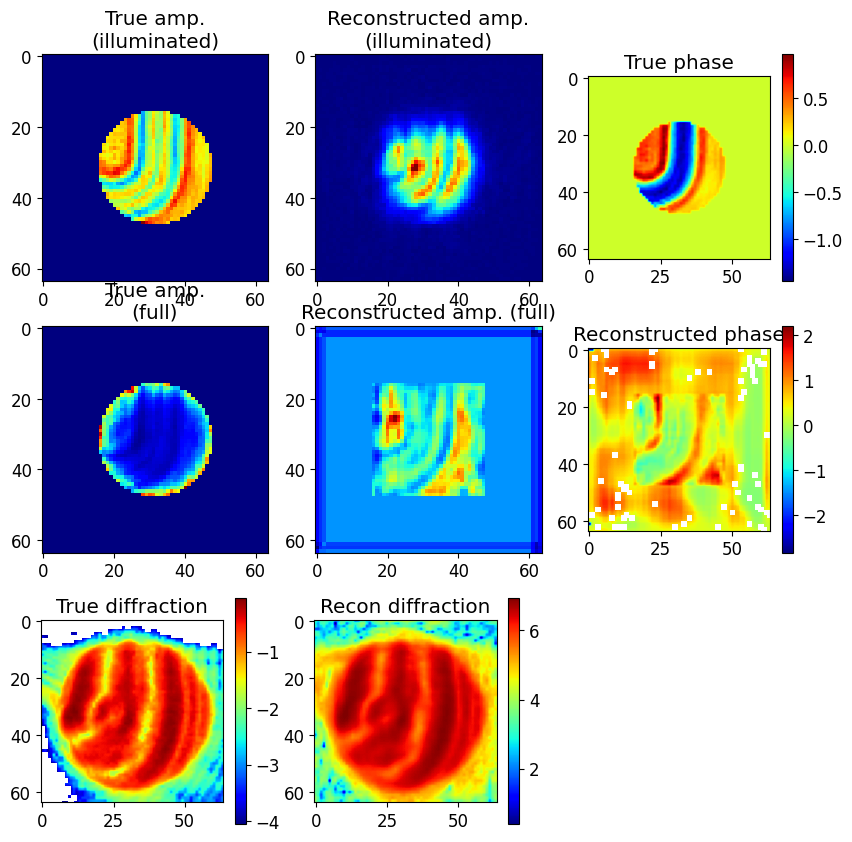

In [12]:
i = 200
from ptycho import evaluation
evaluation.summarize(i, pred_amp + 1, reconstructed_obj, X_test, Y_I_test, Y_phi_test,
                     np.absolute(p.get('probe')[:, :, 0]), 0,
                    crop = False);